In [3]:
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

import numpy as np

import pandas as pd

import seaborn as sns

from matplotlib import rcParams

from tqdm import tqdm

import re

rcParams["axes.facecolor"] = "FFFFFF"
rcParams["savefig.facecolor"] = "FFFFFF"
rcParams["xtick.direction"] = "in"
rcParams["ytick.direction"] = "in"

rcParams['axes.linewidth'] = 2.0

rcParams.update({"figure.autolayout": True})

plt.rcParams["figure.figsize"] = (6, 6)

import numpy as np

import scipy
import jax
import torch

In [41]:
def p_from_m(mean, concentration):
    km = mean + concentration
    return concentration / km

In [5]:
from fast_negative_binomial import negative_binomial, negative_binomial2

In [3]:
%%timeit
for i in range(100):
    scipy.stats.nbinom.pmf(6,4,0.8)

3.12 ms ± 14.8 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [8]:
%%timeit
for i in range(100):
    negative_binomial(6, 4, 0.8)

176 ns ± 2.73 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [5]:
%%timeit
for i in range(100):
    jax.scipy.stats.nbinom.pmf(6, 4, 0.8)

49.6 ms ± 1.22 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
%%timeit
for i in range(100):
    torch.distributions.negative_binomial.NegativeBinomial(6 + 4, 0.8)

1.61 ms ± 17.1 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [6]:
ks = np.random.randint(1, 100, 100)

In [7]:
%%timeit
negative_binomial(ks, 4, 0.8)

4.49 μs ± 39 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [18]:
mean = 5
concentration = 0.5

In [19]:
%%timeit
negative_binomial2(ks, 4, 0.8)

NameError: name 'ks' is not defined

In [21]:
from numpyro.distributions import NegativeBinomial2

nb_dist = NegativeBinomial2(mean = mean, concentration = concentration)

In [34]:
np.allclose(np.exp(nb_dist.log_prob(ks)), negative_binomial2(ks, concentration, mean))

True

In [3]:
negative_binomial2(1, 4, 0.8)

0.3215020576131686

In [4]:
ks_large = np.random.randint(1, 100, 1000000)

In [9]:
%%timeit
negative_binomial2(ks_large, 4, 0.8)

82.2 ms ± 437 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


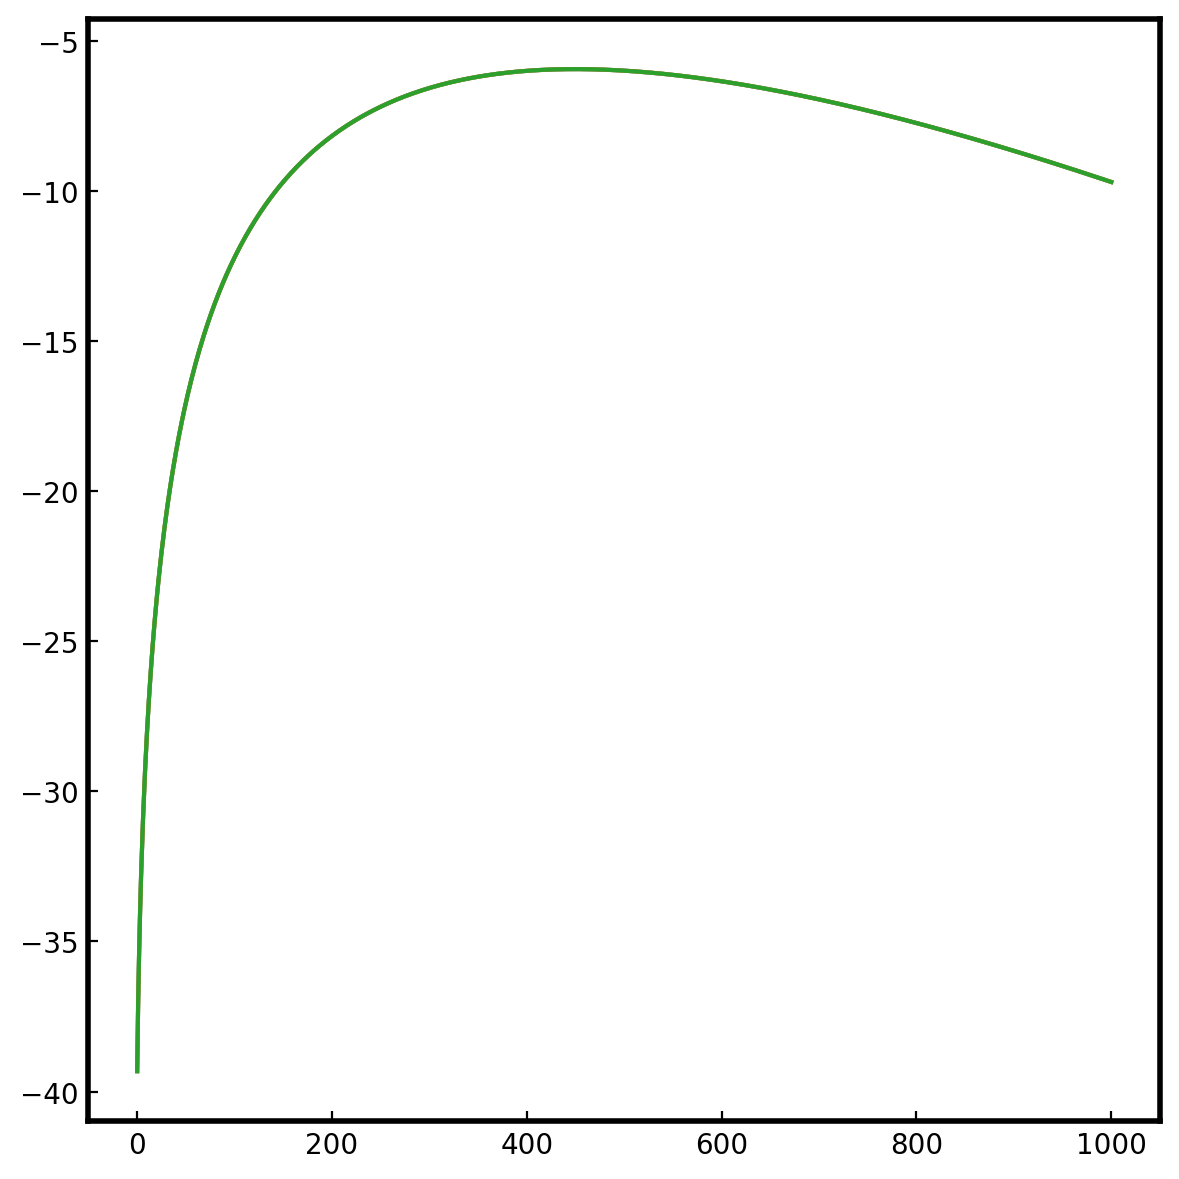

In [66]:
xs = np.linspace(0, 1000, 1000, dtype = int)

mean = 500
concentration = 10

nb_dist = NegativeBinomial2(mean = mean, concentration = concentration)
plt.plot(xs, nb_dist.log_prob(xs))
plt.plot(xs, np.log(negative_binomial2(xs, concentration, mean)))
plt.plot(xs, np.log(scipy.stats.nbinom.pmf(xs, concentration, p_from_m(mean, concentration))))

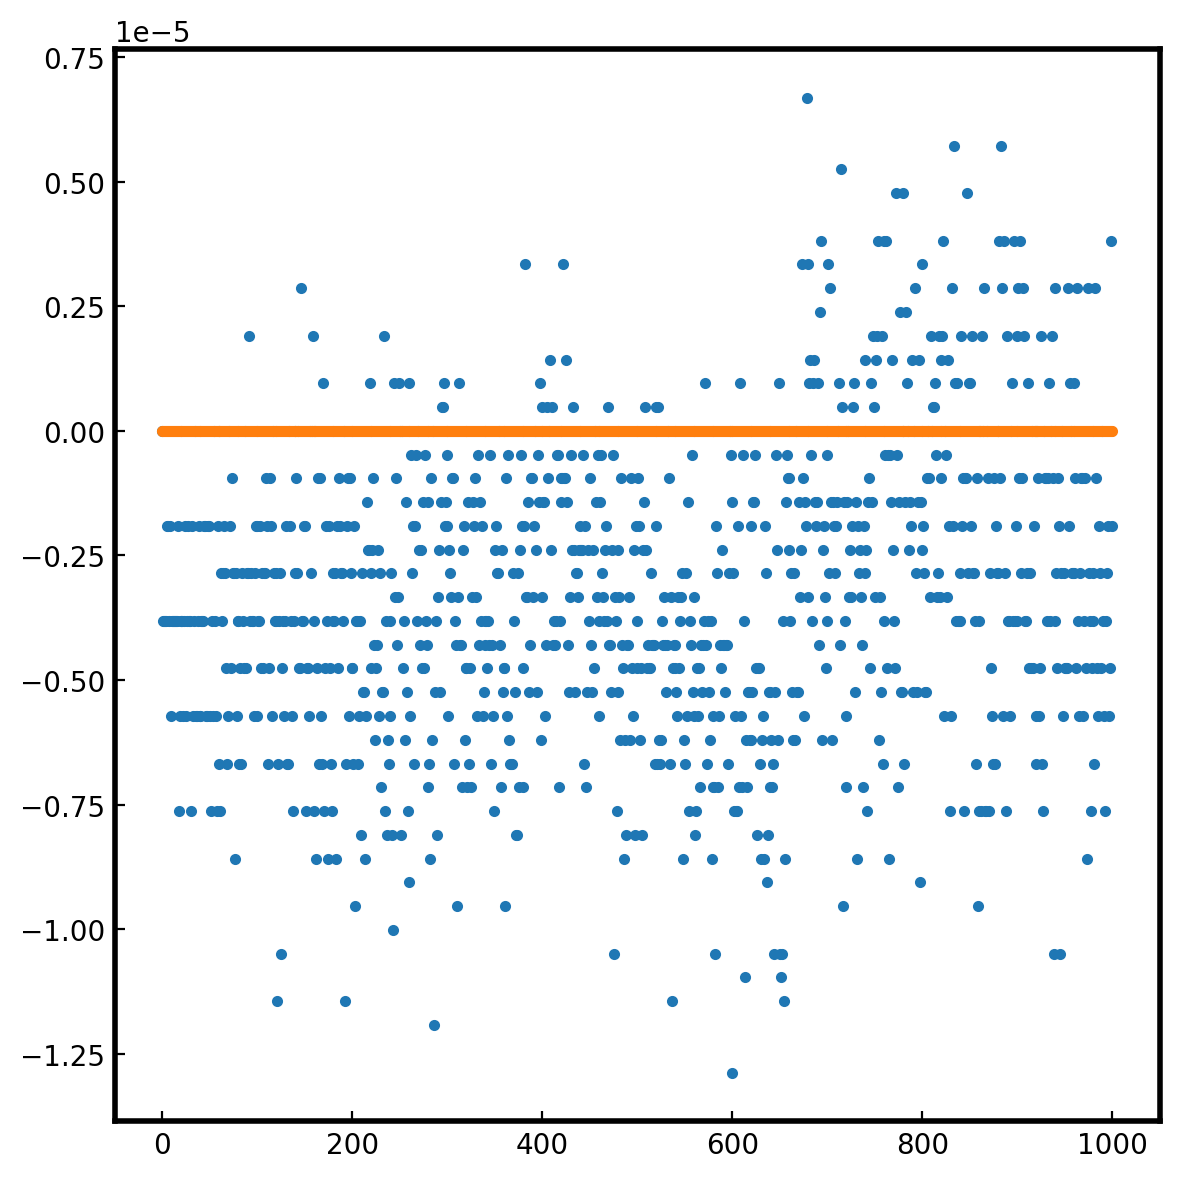

In [67]:
plt.plot(xs, nb_dist.log_prob(xs) - np.log(negative_binomial2(xs, concentration, mean)), '.')
plt.plot(xs, np.log(scipy.stats.nbinom.pmf(xs, concentration, p_from_m(mean, concentration))) - np.log(negative_binomial2(xs, concentration, mean)), '.')